In [1]:
import itk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np_img = np.zeros((44, 44, 44, 44), dtype=np.uint8)
indices = np.indices(np_img.shape)
np_img[(np.linalg.norm(indices - 22, axis=0) < 20.0) & (indices[3] < 22)] = 1
np_img[(np.linalg.norm(indices - 22, axis=0) < 20.0) & (indices[3] >= 22)] = 2

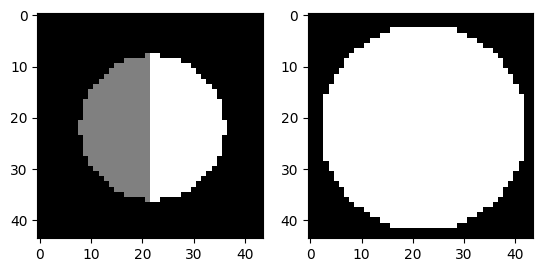

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(np_img[12, :, 12, :], cmap='gray')
ax2.imshow(np_img[22, :, :, 22], cmap='gray')

In [4]:
image = itk.image_from_array(np_img)
image.SetSpacing([1.0, 1.0, 1.0, 2.0])

In [18]:
itk.imwrite(image, 'sphere.mha')

In [11]:
filter = itk.SignedMaurerDistanceMapImageFilter.New(image)
distance_map = filter.GetOutput()
filter.Update()
filter2 = itk.DanielssonDistanceMapImageFilter.New(image)
distance_map2 = filter2.GetDistanceMap()
filter2.Update()

In [12]:
np_dist_map = itk.array_from_image(distance_map)
np_dist_map2 = itk.array_from_image(distance_map2)

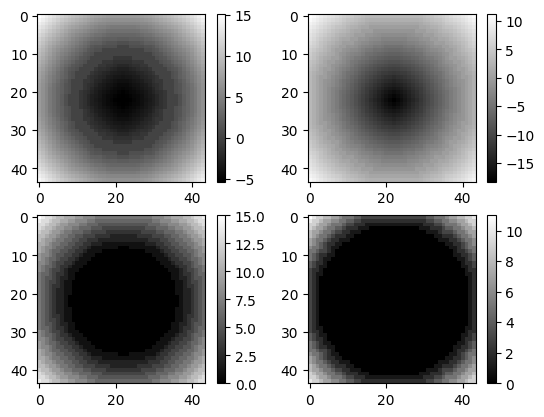

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.colorbar(ax1.imshow(np_dist_map[12, :, 12, :], cmap='gray'), ax=ax1)
fig.colorbar(ax2.imshow(np_dist_map[22, :, :, 22], cmap='gray'), ax=ax2)
fig.colorbar(ax3.imshow(np_dist_map2[12, :, 12, :], cmap='gray'), ax=ax3)
fig.colorbar(ax4.imshow(np_dist_map2[22, :, :, 22], cmap='gray'), ax=ax4)

In [14]:
dist_vec_map = filter2.GetVectorDistanceMap()
np_dist_vec_map = np.empty((44, 44, 44, 44, 4), dtype=np.int32)
for i in range(44):
    for j in range(44):
        for k in range(44):
            for l in range(44):
                for m in range(4):
                    np_dist_vec_map[i, j, k, l, m] = dist_vec_map.GetPixel([i, j, k, l])[m]

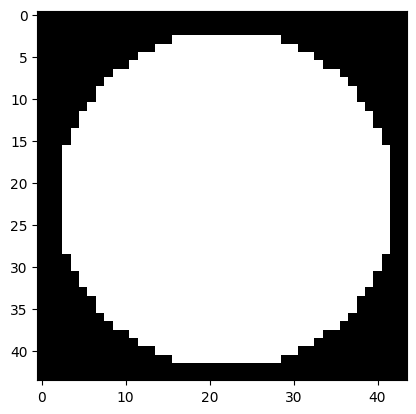

In [15]:
zero_len = np.linalg.norm(np_dist_vec_map[22, :, :, 22, :], axis=2) == 0
plt.imshow(zero_len, cmap='gray')

In [16]:
np.all(np_img[22, :, :, 22] == zero_len)

False

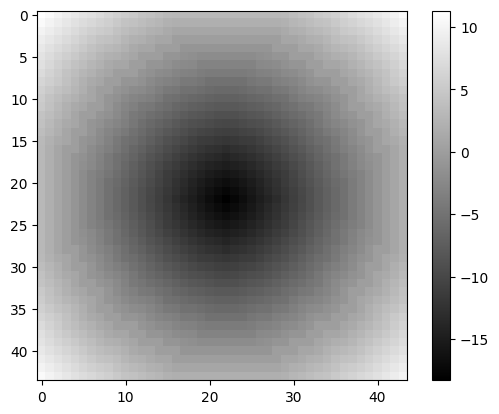

In [17]:
fig, ax1 = plt.subplots(1,1)
fig.colorbar(ax1.imshow(np_dist_map[22, :, :, 22], cmap='gray'), ax=ax1)

In [18]:
thinned = itk.BinaryThinningImageFilter.New(image)
thinned_arr = itk.array_from_image(thinned.GetOutput())
thinned.Update()
plt.imshow(thinned_arr[22, :, :, 22], cmap='gray')

TemplateTypeError: itk.BinaryThinningImageFilter is not wrapped for input type `None`.

To limit the size of the package, only a limited number of
types are available in ITK Python. To print the supported
types, run the following command in your python environment:

    itk.BinaryThinningImageFilter.GetTypes()

Possible solutions:
* If you are an application user:
** Convert your input image into a supported format (see below).
** Contact developer to report the issue.
* If you are an application developer, force input images to be
loaded in a supported pixel type.

    e.g.: instance = itk.BinaryThinningImageFilter[itk.Image[itk.UC,2], itk.Image[itk.UC,2]].New(my_input)

* (Advanced) If you are an application developer, build ITK Python yourself and
turned to `ON` the corresponding CMake option to wrap the pixel type or image
dimension you need. When configuring ITK with CMake, you can set
`ITK_WRAP_${type}` (replace ${type} with appropriate pixel type such as
`double`). If you need to support images with 4 or 5 dimensions, you can add
these dimensions to the list of dimensions in the CMake variable
`ITK_WRAP_IMAGE_DIMS`.

Supported input types:

itk.Image[itk.UC,2]
itk.Image[itk.US,2]
itk.Image[itk.SS,2]
